# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.



El propósito del proyecto para la empresa de telecomunucaciones Megaline es comprender, interpretar, comparar y visualizar distintos aspectos de sus planes Surf y Ultimate a través de varias herramientas del análisis de datos. 
Primero limpiaremos los dataframes que nos proporcionó el cliente, los cuales contienen datos como los usuarios, sus planes respectivos, llamadas, mensajes, minutos e internet para que así podamos proceder con reponder las preguntas del cliente. Se revisará desde los ingresos generados por plan, el promedio de llamdas, la distribución de los mensajes e internet. La representación de estos datos se harán a través de varias herramientas de visualización de datos, las cuales ayudarán a que el cliente tenga una presentación clara de los datos de cada rubro de los planes. Por último, se usarán breves prubas de estadísticas para corroborar hipótesis sobre la diferencia de ingresos entre los planes surf y ultimate. 


## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El contenido y tipo de datos que la tabla plans son correctos en cuanto a la información proporcionada por el cliente. Sin embargo, se puede cambiar la columna de plan_name a la posición cero para una visualización más clara, así como también agregar el rubro de GB por mes para que complemente la información de cada plan. 

## Corregir datos

In [5]:
plans.insert(0,"plan_name", plans.pop("plan_name"))
plans

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


## Enriquecer los datos

In [6]:
plans["gb_per_month_included"] = plans["mb_per_month_included"]/1024
plans.insert(3,"gb_per_month_included", plans.pop("gb_per_month_included"))

In [7]:
plans

,plan_name,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,15.0,500,20,10,0.03,0.03
1,ultimate,1000,30720,30.0,3000,70,7,0.01,0.01


## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios
users.sample(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
182,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,NaN
71,1071,Isa,Roy,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-23,surf,NaN
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaN
106,1106,Eddy,Garrison,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-10,surf,2018-11-14
156,1156,Anette,Chambers,71,"Albuquerque, NM MSA",2018-03-25,surf,NaN
379,1379,Jarrett,Spencer,34,"Grand Rapids-Kentwood, MI MSA",2018-10-18,surf,NaN
422,1422,Georgianne,Huff,41,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-04-03,ultimate,NaN
278,1278,Masako,Montgomery,39,"Dayton-Kettering, OH MSA",2018-11-03,surf,NaN
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
476,1476,Tammara,Dorsey,24,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-10,ultimate,NaN


Algunas columnas tienen tipos de datos que pueden ser cambiados para facilitar el análisis. Por ejemplo, user_id sería mejor si se cambia al tipo object. La columna churn_date tiene datos ausentes, los cuales pueden ser llenados con la fecha actual, ya que el cliente confirmó que se tratan de los usuarios que aún están activos. Ya que se llenaron los datos ausentes, podemos cambiar el tipo de dato de churn_date a datetime. Finalmente podemos remover de la columan city la palabra "MSA" que se encuentra al final de cada ciudad. Esta palabra significa "Metropolitan Statistical Area", pero no es significtiva para el análisis. 
Para enriquecer los datos se creo una columna nueva llamada state para que se pueda analizar una prueba de hipótesis al final del proyecto. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
users["user_id"] = users["user_id"].astype(object)

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    object
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


In [12]:
users["churn_date"] = pd.to_datetime(users["churn_date"], errors="coerce")
users["churn_date"] = users["churn_date"].fillna(pd.to_datetime("today"))
users["churn_date"] = users["churn_date"].dt.date
users["churn_date"] = pd.to_datetime(users["churn_date"])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


In [13]:
users["city"] = users["city"].str.replace("MSA", "", regex=False)

In [14]:
users.sample(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
320,1320,Bert,Wells,23,"Los Angeles-Long Beach-Anaheim, CA",2018-02-23,surf,2024-12-27
143,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN",2018-10-26,surf,2024-12-27
131,1131,Shane,Morrison,60,"Los Angeles-Long Beach-Anaheim, CA",2018-01-07,surf,2024-12-27
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI",2018-04-04,ultimate,2024-12-27
420,1420,Season,Hardy,27,"San Francisco-Oakland-Berkeley, CA",2018-02-22,ultimate,2024-12-27
348,1348,Carl,Rutledge,60,"Detroit-Warren-Dearborn, MI",2018-10-05,surf,2024-12-27
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA",2018-12-10,ultimate,2024-12-27
457,1457,Janean,Lynch,47,"New York-Newark-Jersey City, NY-NJ-PA",2018-02-17,surf,2024-12-27
312,1312,Kory,Emerson,42,"Fresno, CA",2018-01-26,surf,2024-12-27
185,1185,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN",2018-01-14,ultimate,2024-12-27


### Enriquecer los datos

In [15]:
users["state"] = users["city"].str.split(",").str[1].str.strip()
users.insert(5,"state", users.pop("state"))
users

,user_id,first_name,last_name,age,city,state,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",GA,2018-12-24,ultimate,2024-12-27
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",WA,2018-08-13,surf,2024-12-27
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV",NV,2018-10-21,surf,2024-12-27
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK",OK,2018-01-28,surf,2024-12-27
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA",WA,2018-05-23,surf,2024-12-27
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-09-04,surf,2024-12-27
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA",LA,2018-02-20,surf,2024-12-27
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA",CA,2018-12-10,ultimate,2024-12-27
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-02-04,surf,2024-12-27


## Llamadas

In [16]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Imprime una muestra de datos para las llamadas
calls.sample(10)

,id,user_id,call_date,duration
24344,1091_112,1091,2018-11-18,0.00
38745,1144_691,1144,2018-09-30,0.00
114643,1401_461,1401,2018-11-06,0.00
57133,1203_524,1203,2018-08-25,12.44
25826,1099_146,1099,2018-03-19,11.56
113484,1399_107,1399,2018-10-18,7.39
33776,1126_620,1126,2018-06-30,0.00
64946,1236_219,1236,2018-09-09,0.00
3917,1016_207,1016,2018-11-22,3.90
101266,1362_0,1362,2018-05-05,4.99


Para esta tabla igualmente se cambiarán los user_id a tipo de dato object. Así como también la fecha a datetime. El cliente especificó que las llamadas se redondean, por lo que será necesario hacer este cambio en la columna duration. Al final se enriquecieron los datos a través de crear una columna nueva llamada dayofweek para que podamos extraer el dia de la semana en que los clientes realizan sus llamadas. Igualmente se creó una columna llamada call_duration_class para determinar si la duración de las llamadas son cortas, promedio o largas. 


### Corregir los datos

In [18]:
calls["user_id"] = calls["user_id"].astype(object)

In [19]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  object 
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.2+ MB


In [20]:
calls["call_date"] = pd.to_datetime(calls["call_date"])

In [21]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


In [22]:
calls["duration"] = np.ceil(calls["duration"])
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


### Enriquecer los datos

In [23]:
calls["day_of_week"] = calls["call_date"].dt.dayofweek
calls

,id,user_id,call_date,duration,day_of_week
0,1000_93,1000,2018-12-27,9.0,3
1,1000_145,1000,2018-12-27,14.0,3
2,1000_247,1000,2018-12-27,15.0,3
3,1000_309,1000,2018-12-28,6.0,4
4,1000_380,1000,2018-12-30,5.0,6
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,2
137731,1499_200,1499,2018-10-20,11.0,5
137732,1499_201,1499,2018-09-21,9.0,4
137733,1499_202,1499,2018-10-10,1.0,2


In [24]:
def classify_duration(duration):
    if duration < 5:
        return "Short"
    elif 5 <= duration < 15:
        return "Medium"
    else:
        return "Long"

calls["call_duration_class"] = calls["duration"].apply(classify_duration)

calls

,id,user_id,call_date,duration,day_of_week,call_duration_class
0,1000_93,1000,2018-12-27,9.0,3,Medium
1,1000_145,1000,2018-12-27,14.0,3,Medium
2,1000_247,1000,2018-12-27,15.0,3,Long
3,1000_309,1000,2018-12-28,6.0,4,Medium
4,1000_380,1000,2018-12-30,5.0,6,Medium
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,2,Medium
137731,1499_200,1499,2018-10-20,11.0,5,Medium
137732,1499_201,1499,2018-09-21,9.0,4,Medium
137733,1499_202,1499,2018-10-10,1.0,2,Short


## Mensajes

In [25]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Imprime una muestra de datos para los mensajes
messages.sample(15)

,id,user_id,message_date
27631,1172_88,1172,2018-11-24
19154,1124_41,1124,2018-10-29
42341,1276_6,1276,2018-10-10
22220,1133_134,1133,2018-09-25
68382,1440_248,1440,2018-12-03
60969,1384_3,1384,2018-11-15
18186,1119_1061,1119,2018-10-17
11575,1078_42,1078,2018-11-29
15237,1101_294,1101,2018-11-26
52298,1336_264,1336,2018-06-25


Para esta tabla igualmente se cambiarán los user_id a tipo de dato object. Así como también la fecha a datetime. Como en la anterior tabla, se enriquecieron los datos a través de crear una columna nueva llamada dayofweek para que podamos extraer el dia de la semana en que los clientes mandan mensajes. 

### Corregir los datos

In [27]:
messages["user_id"] = messages["user_id"].astype(object)
messages["message_date"] = pd.to_datetime(messages["message_date"])

In [28]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

In [29]:
messages["day_of_week"] = messages["message_date"].dt.dayofweek
messages

,id,user_id,message_date,day_of_week
0,1000_125,1000,2018-12-27,3
1,1000_160,1000,2018-12-31,0
2,1000_223,1000,2018-12-31,0
3,1000_251,1000,2018-12-27,3
4,1000_255,1000,2018-12-26,2
...,...,...,...,...
76046,1497_526,1497,2018-12-24,0
76047,1497_536,1497,2018-12-24,0
76048,1497_547,1497,2018-12-31,0
76049,1497_558,1497,2018-12-24,0


## Internet

In [30]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(15)

,id,user_id,session_date,mb_used
59277,1267_79,1267,2018-12-30,0.00
36421,1164_104,1164,2018-08-10,525.80
79607,1371_355,1371,2018-12-28,577.49
26138,1122_93,1122,2018-09-28,395.66
85702,1399_314,1399,2018-09-11,183.64
11310,1055_315,1055,2018-05-19,27.75
104176,1498_239,1498,2018-04-14,517.42
12522,1061_19,1061,2018-05-12,0.00
53983,1245_16,1245,2018-09-11,0.00
63051,1291_176,1291,2018-12-27,207.54


En la última tabla se cambiará el tipo de dato a datetime para la columna session_date ya que se trata de una fecha. Para enriquecer los datos se creó la columna gb_used para que también tengamos un cálculo de los GB usadas por usuario y complementarlo a partir de los mb_used. 

### Corregir los datos

In [32]:
internet["session_date"] = pd.to_datetime(internet["session_date"])

In [33]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [34]:
internet["gb_used"] = (internet["mb_used"]/1024)
internet

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.212949
104821,1499_216,1499,2018-12-30,304.72,0.297578
104822,1499_217,1499,2018-09-22,292.75,0.285889
104823,1499_218,1499,2018-12-07,0.00,0.000000


## Estudiar las condiciones de las tarifas

In [35]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,plan_name,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,15.0,500,20,10,0.03,0.03
1,ultimate,1000,30720,30.0,3000,70,7,0.01,0.01


## Agregar datos por usuario


In [36]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado. #Se incluye en el calculo de la cantidad de minutos usados por cada usuario al mes.
calls["month"] = calls["call_date"].dt.month
calls_pivot = calls.pivot_table(index=["user_id","month"], values="duration", aggfunc=["sum", "count"])
calls_pivot.columns = ["total_minutes", "total_calls"]
calls_pivot = calls_pivot.reset_index()
calls_pivot

,user_id,month,total_minutes,total_calls
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64
...,...,...,...,...
2253,1498,12,339.0,39
2254,1499,9,346.0,41
2255,1499,10,385.0,53
2256,1499,11,308.0,45


In [37]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages["month"] = messages["message_date"].dt.month
messages_per_month = messages.groupby(["user_id","month"])["id"].count().reset_index()
messages_per_month.columns = ["user_id", "month", "total_messages"]
messages_per_month

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [38]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet["month"] = internet["session_date"].dt.month
mb_per_month = internet.groupby(["user_id","month"])["gb_used"].sum().reset_index()
mb_per_month["gb_used"] = mb_per_month["gb_used"].apply(np.ceil)
mb_per_month

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [39]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_data = pd.merge(calls_pivot, messages_per_month, on=["user_id","month"], how="outer") 
filtered_user_data = calls_data.merge(mb_per_month, on=["user_id", "month"], how="outer")
filtered_user_data

,user_id,month,total_minutes,total_calls,total_messages,gb_used
0,1000,12,124.0,16.0,11.0,2.0
1,1001,8,182.0,27.0,30.0,7.0
2,1001,9,315.0,49.0,44.0,14.0
3,1001,10,393.0,65.0,53.0,22.0
4,1001,11,426.0,64.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13.0
2289,1361,5,NaN,NaN,2.0,2.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,1.0


In [40]:
# Añade la información de la tarifa
filtered_user_data = filtered_user_data.merge(users[["plan","user_id"]],on="user_id", how="left")
filtered_user_data

,user_id,month,total_minutes,total_calls,total_messages,gb_used,plan
0,1000,12,124.0,16.0,11.0,2.0,ultimate
1,1001,8,182.0,27.0,30.0,7.0,surf
2,1001,9,315.0,49.0,44.0,14.0,surf
3,1001,10,393.0,65.0,53.0,22.0,surf
4,1001,11,426.0,64.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13.0,surf
2289,1361,5,NaN,NaN,2.0,2.0,surf
2290,1482,10,NaN,NaN,2.0,NaN,ultimate
2291,1108,12,NaN,NaN,NaN,1.0,ultimate


In [41]:
# Calcula el ingreso mensual para cada usuario

plan_details = {
    "plan": ["surf", "ultimate"],
    "minutes_limit": [500, 3000],  
    "messages_limit": [50, 1000],  
    "data_limit": [15, 30],  
    "minutes_rate": [0.03, 0.01],  
    "message_rate": [0.01, 0.03], 
    "data_rate": [10, 7], 
    "plan_cost": [20, 70]}

df_plans = pd.DataFrame(plan_details)

df = pd.merge(filtered_user_data, df_plans, on="plan", how="left")
df = df.fillna(0)

df["excess_minutes"] = (df["total_minutes"] - df["minutes_limit"]).clip(lower=0)
df["excess_messages"] = (df["total_messages"] - df["messages_limit"]).clip(lower=0)
df["excess_data"] = (df["gb_used"] - df["data_limit"]).clip(lower=0)

df["extra_minutes_cost"] = df["excess_minutes"] * df["minutes_rate"]
df["extra_message_cost"] = df["excess_messages"] * df["message_rate"]
df["extra_data_cost"] = df["excess_data"] * df["data_rate"]

df["total_revenue"] = df["plan_cost"] + df["extra_minutes_cost"] + df["extra_message_cost"] + df["extra_data_cost"]

df


,user_id,month,total_minutes,total_calls,total_messages,gb_used,plan,minutes_limit,messages_limit,data_limit,...,message_rate,data_rate,plan_cost,excess_minutes,excess_messages,excess_data,extra_minutes_cost,extra_message_cost,extra_data_cost,total_revenue
0,1000,12,124.0,16.0,11.0,2.0,ultimate,3000,1000,30,...,0.03,7,70,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1001,8,182.0,27.0,30.0,7.0,surf,500,50,15,...,0.01,10,20,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2,1001,9,315.0,49.0,44.0,14.0,surf,500,50,15,...,0.01,10,20,0.0,0.0,0.0,0.0,0.00,0.0,20.00
3,1001,10,393.0,65.0,53.0,22.0,surf,500,50,15,...,0.01,10,20,0.0,3.0,7.0,0.0,0.03,70.0,90.03
4,1001,11,426.0,64.0,36.0,19.0,surf,500,50,15,...,0.01,10,20,0.0,0.0,4.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0,surf,500,50,15,...,0.01,10,20,0.0,11.0,0.0,0.0,0.11,0.0,20.11
2289,1361,5,0.0,0.0,2.0,2.0,surf,500,50,15,...,0.01,10,20,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2290,1482,10,0.0,0.0,2.0,0.0,ultimate,3000,1000,30,...,0.03,7,70,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2291,1108,12,0.0,0.0,0.0,1.0,ultimate,3000,1000,30,...,0.03,7,70,0.0,0.0,0.0,0.0,0.00,0.0,70.00


## Estudia el comportamiento de usuario

### Llamadas

/tmp/ipykernel_171/1695910166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf_calls["avg_duration"] = surf_calls["total_minutes"] / surf_calls["total_calls"]
/tmp/ipykernel_171/1695910166.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate_calls["avg_duration"] = ultimate_calls["total_minutes"] / ultimate_calls["total_calls"]


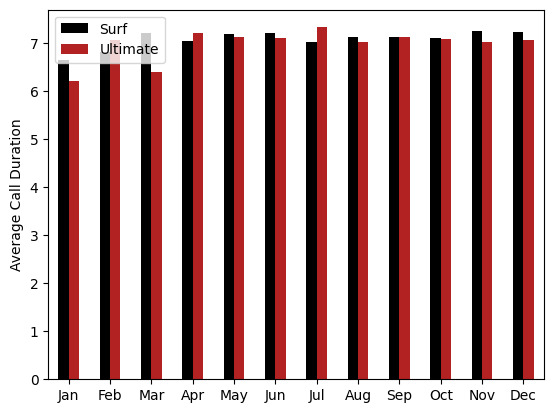

In [42]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

surf_calls = filtered_user_data[filtered_user_data["plan"] == "surf"]
ultimate_calls = filtered_user_data[filtered_user_data["plan"] == "ultimate"]
surf_calls["avg_duration"] = surf_calls["total_minutes"] / surf_calls["total_calls"]
ultimate_calls["avg_duration"] = ultimate_calls["total_minutes"] / ultimate_calls["total_calls"]

surf_comparative_calls = surf_calls.groupby("month")["avg_duration"].mean()
ultimate_comparative_calls = ultimate_calls.groupby("month")["avg_duration"].mean()

df_concat_calls = pd.concat([surf_comparative_calls,ultimate_comparative_calls], axis=1)

df_concat_calls.plot(kind="bar", rot=0, color=["black","firebrick"])

plt.xlabel("")
plt.ylabel("Average Call Duration")
plt.legend(["Surf","Ultimate"])
plt.xticks(ticks=[0,1, 2, 3, 4, 5,6,7,8,9,10,11], labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.legend(["Surf","Ultimate"])
plt.show()


Text(0.5, 0, 'Used Minutes Distribution')

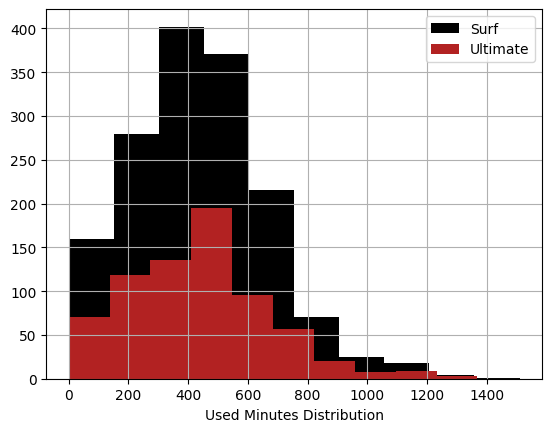

In [43]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_calls = filtered_user_data[filtered_user_data["plan"] == "surf"] 
ultimate_calls = filtered_user_data[filtered_user_data["plan"] == "ultimate"]

surf_calls["total_minutes"].hist(color="black")
ultimate_calls["total_minutes"].hist(color="firebrick")
plt.legend(["Surf","Ultimate"])
plt.xlabel("Used Minutes Distribution")

In [44]:
# Calcula la media y la varianza de la duración mensual de llamadas.
filtered_user_data["calls_duration_avg"] = filtered_user_data["total_minutes"] / filtered_user_data["total_calls"]
mean = filtered_user_data.groupby("plan")["calls_duration_avg"].mean().reset_index()
mean

,plan,calls_duration_avg
0,surf,7.158130
1,ultimate,7.078557


In [45]:
var = filtered_user_data.groupby("plan")["calls_duration_avg"].var().reset_index()
var

,plan,calls_duration_avg
0,surf,1.227523
1,ultimate,0.915475


Text(0, 0.5, 'Minutes Used')

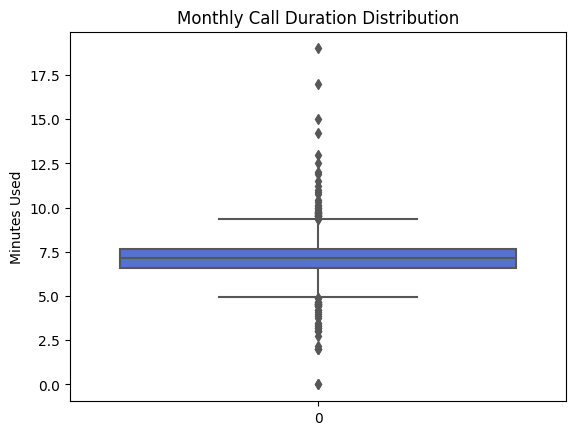

In [46]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
call_distribution = filtered_user_data["total_minutes"] / filtered_user_data["total_calls"]
sns.boxplot(data=call_distribution, color="royalblue")
plt.title("Monthly Call Duration Distribution")
plt.ylabel("Minutes Used")

En la primera gráfica comprobamos la duración promedio de las llamadas entre ambos planes. Los usuarios de ambos planes mantienen la duración de sus llamadas a máximo 7 minutos. Por lo que el comportamiento de ambos usuarios no difiere en ninguno de los meses. El dato exacto de la duración promedio de la duración de las llamadas se corrobora al calcular sus medias, en donde los usuarios de surf mantienen llamadas por 7.15 y los de ultimate de 7.07. En cuanto a la varianza también nos confirma que el promedio se concentra en los 7 minutos ya que la variabilidad de los datos es de solo 1 y 0.9. 

En el diagrama de caja podemos visulizar que la media está en los 7 minutos. También se puede contemplar la distribución de los datos atípicos, siendo entre 18 a 20 minutos el máximo de los valores de la duración de llamadas. 

En la tabla de distribución se revisa que para el plan ultimate la mayoría emplea entre 400 a 600 minutos. El plan surf emplea mayoritariamente entre 300 a 450 minutos. Por lo que los usuarios de este plan aprovechan al máximo los 500 minutos que tienen permitidos dentro del plan.

Por lo tanto, a pesar de que los usuarios de ultimate tienen 2500 minutos más a comparación de los usuarios de surf, los usuarios de ambos planes mantienen en promedio llamadas cortas de 7 minutos al mes. 

### Mensajes

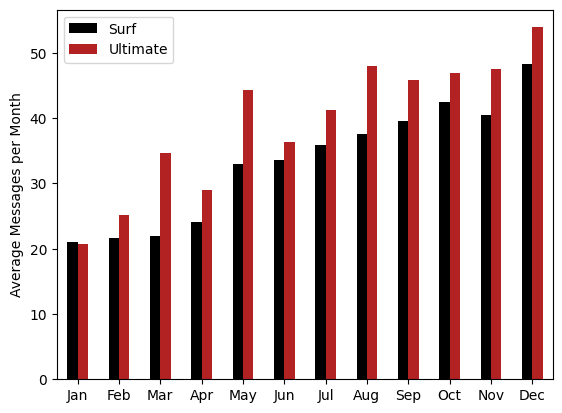

In [47]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

surf_calls = filtered_user_data[filtered_user_data["plan"] == "surf"]
ultimate_calls = filtered_user_data[filtered_user_data["plan"] == "ultimate"]


surf_comparative_messages = surf_calls.groupby("month")["total_messages"].mean()
ultimate_comparative_messages = ultimate_calls.groupby("month")["total_messages"].mean()

df_concat_messages = pd.concat([surf_comparative_messages,ultimate_comparative_messages], axis=1)

df_concat_messages.plot(kind="bar", rot=0, color=["black","firebrick"])

plt.xlabel("")
plt.ylabel("Average Messages per Month")
plt.xticks(ticks=[0,1, 2, 3, 4, 5,6,7,8,9,10,11], labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.legend(["Surf","Ultimate"])
plt.show()


Para los mensajes los usuarios de ultimate utilizan más mensajes que los usuarios de surf, entre un promedio de 30 a 40 mensajes al mes. Mientras que los usuarios de surf mandan en promedio entre 20 a 30 mensajes al mes. El total de mensajes empleados por cada plan no sigue una secuencia lógica, pero los picos de mayor uso de mensajes se ven durante los ultimos meses del año, entre agosto y diciembre. Esto se debe simplemente a la capacidad de SMS permitidos al mes por cada plan. 

### Internet

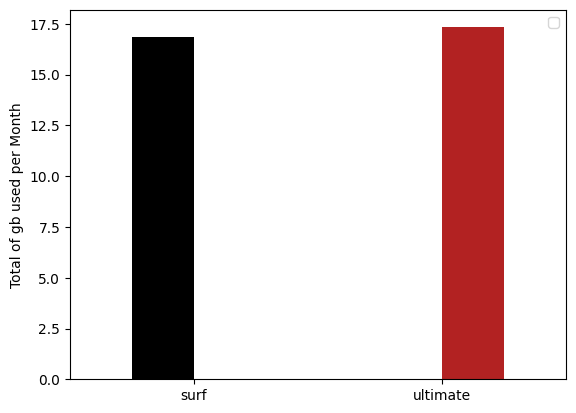

In [48]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_gb = filtered_user_data[filtered_user_data["plan"] == "surf"]
ultimate_gb = filtered_user_data[filtered_user_data["plan"] == "ultimate"]


surf_comparative_gb = surf_gb.groupby("plan")["gb_used"].mean()
ultimate_comparative_gb = ultimate_gb.groupby("plan")["gb_used"].mean()

df_concat_gb = pd.concat([surf_comparative_gb,ultimate_comparative_gb], axis=1)

df_concat_gb.plot(kind="bar", rot=0, color=["black","firebrick"])

plt.xlabel("")
plt.ylabel("Total of gb used per Month")
plt.legend([])
plt.show()

Para el uso de datos de internet, los usuarios de ambos planes usan casi la misma cantidad, hasta 16 a 17 GB. Se pueden concluir que para los usuarios del plan surf, es probable que se pasen de su cantidad permitida de internet de 15 GB mensuales. Por lo que también se puede inferir que este es el rubro que más utilizan comparado a las llamadas y mensajes. Los usuarios de ultimate  usan casi la misma de 17 GB a pesar de que tienen 30 GB permitidos al mes. 

## Ingreso

In [49]:
print("El valor de la media de los ingresos es: ")
df["total_revenue"].mean()

El valor de la media de los ingresos es: 


64.25493240296555

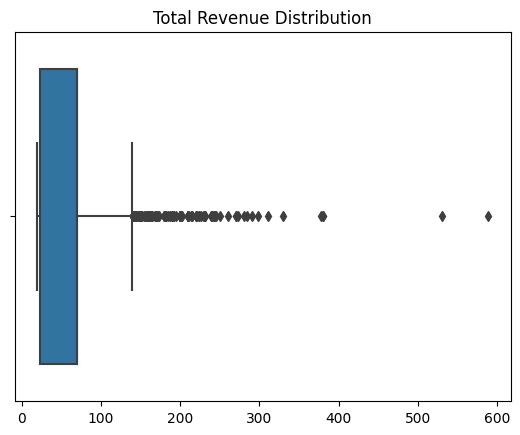

In [50]:
sns.boxplot(x=df["total_revenue"])
plt.title("Total Revenue Distribution")
plt.xlabel("")
plt.show()

In [51]:
print("El valor de la mediana de los ingresos es: ")
df["total_revenue"].median()

El valor de la mediana de los ingresos es: 


70.0

In [52]:
print("El valor de la media de los ingresos del plan surf es: ")
df[df["plan"] == "surf"]["total_revenue"].mean()

El valor de la media de los ingresos del plan surf es: 


60.566153846153846

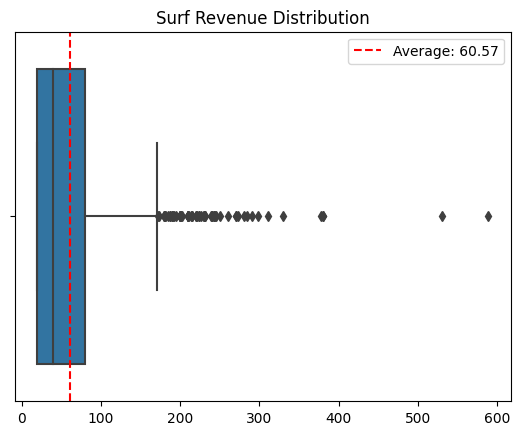

In [53]:
surf_data = df[df["plan"] == "surf"]["total_revenue"]
surf_revenue_mean = surf_data.mean()

sns.boxplot(x=surf_data)

plt.axvline(surf_revenue_mean, color="red", linestyle='--', label=f'Average: {surf_revenue_mean:.2f}')

plt.title("Surf Revenue Distribution")
plt.xlabel("")
plt.legend()
plt.show()

In [54]:
print("El valor de la media de los ingresos del plan ultimate es: ")
df[df["plan"] == "ultimate"]["total_revenue"].mean()

El valor de la media de los ingresos del plan ultimate es: 


72.31388888888888

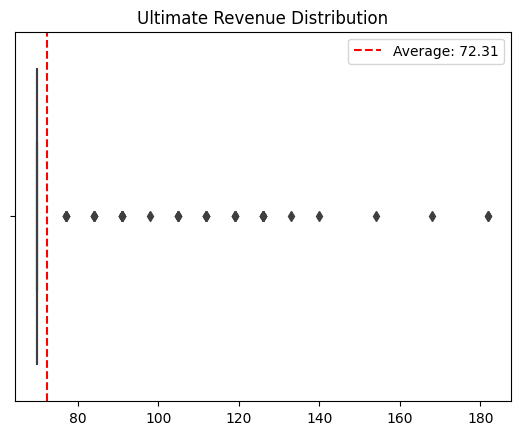

In [55]:
ultimate_data = df[df["plan"] == "ultimate"]["total_revenue"]
ultimate_revenue_mean = ultimate_data.mean()

sns.boxplot(x=ultimate_data)

plt.axvline(ultimate_revenue_mean, color="red", linestyle='--', label=f'Average: {ultimate_revenue_mean:.2f}')

plt.title("Ultimate Revenue Distribution")
plt.xlabel("")
plt.legend()
plt.show()

In [56]:
print("La desviación estándar de los ingresos es: ")
df["total_revenue"].std()

La desviación estándar de los ingresos es: 


46.5768579535089

El valor promedio de ingresos que generan ambos planes es de 70 dólares. Sin embargo, el plan que genera más ingresos promedios comparados a su costo base de 20 USD es el surf, ya que los ingresos promedio que genera es de 60 USD. Es decir que el usuario promedio se excede en el uso de uno de los rubros de su plan, ya que genera 40 USD más en promedio. Con base en los análisis del uso de llamadas, mensajes y datos, se corroboró que los usuarios de surf usan en promedio 17 GB de los 15 GB permitidos. Por lo que al sobrepasar este límite genera el cargo de 10 USD por GB de más y así se generan más ingresos para este plan. 

Comparado con el plan ultimate que genera en promedio 72.31, solo 2 dólares más que el costo base del plan de 70 USD. Esto significa que los límites de este plan son adecuados al costo que deben de pagar los usuarios y que los rubros de cada plan cubren de manera ideal las necesidades de los usuarios. 

## Prueba las hipótesis estadísticas

-  H0= El promedio de los ingresos que generan surf es el mismo que el promedio de ingresos de ultimate.
-  H1= El promedio de los ingresos que generan surf es diferente al promedio de ingresos de ultimate. 
-  Valor alpha = 0.05

In [57]:
# Prueba las hipótesis 
surf_revenue = df[df["plan"] == "surf"]
ultimate_revenue = df[df["plan"] == "ultimate"]

alpha = 0.05 

results_revenue = st.ttest_ind(surf_revenue["total_revenue"], ultimate_revenue["total_revenue"]) 

print("valor p: ", results_revenue.pvalue) 

if results_revenue.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  1.8767813403765117e-08
Rechazamos la hipótesis nula


-  H0= El premedio entre los ingresos que generan los usuarios en el área de NY-NJ es el mismo que el de los usuarios del resto de los estados
-  H1= El premedio entre los ingresos que generan los usuarios en el área de NY-NJ es diferente al de los usuarios del resto de los estados
-  Valor alpha = 0.05

In [58]:
# Prueba las hipótesis
df_merged = df.merge(users, on="user_id", how="left")

In [59]:
df_merged

,user_id,month,total_minutes,total_calls,total_messages,gb_used,plan_x,minutes_limit,messages_limit,data_limit,...,extra_data_cost,total_revenue,first_name,last_name,age,city,state,reg_date,plan_y,churn_date
0,1000,12,124.0,16.0,11.0,2.0,ultimate,3000,1000,30,...,0.0,70.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",GA,2018-12-24,ultimate,2024-12-27
1,1001,8,182.0,27.0,30.0,7.0,surf,500,50,15,...,0.0,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",WA,2018-08-13,surf,2024-12-27
2,1001,9,315.0,49.0,44.0,14.0,surf,500,50,15,...,0.0,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",WA,2018-08-13,surf,2024-12-27
3,1001,10,393.0,65.0,53.0,22.0,surf,500,50,15,...,70.0,90.03,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",WA,2018-08-13,surf,2024-12-27
4,1001,11,426.0,64.0,36.0,19.0,surf,500,50,15,...,40.0,60.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",WA,2018-08-13,surf,2024-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0,surf,500,50,15,...,0.0,20.11,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH",MA-NH,2018-10-01,surf,2024-12-27
2289,1361,5,0.0,0.0,2.0,2.0,surf,500,50,15,...,0.0,20.00,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL",AL,2018-04-14,surf,2024-12-27
2290,1482,10,0.0,0.0,2.0,0.0,ultimate,3000,1000,30,...,0.0,70.00,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-01-01,ultimate,2024-12-27
2291,1108,12,0.0,0.0,0.0,1.0,ultimate,3000,1000,30,...,0.0,70.00,Porfirio,Kane,45,"Salt Lake City, UT",UT,2018-12-30,ultimate,2024-12-27


In [60]:
users_NY_NJ = df_merged[df_merged["city"].str.contains("NY-NJ")] 
users_NY_NJ

,user_id,month,total_minutes,total_calls,total_messages,gb_used,plan_x,minutes_limit,messages_limit,data_limit,...,extra_data_cost,total_revenue,first_name,last_name,age,city,state,reg_date,plan_y,churn_date
56,1014,11,163.0,28.0,9.0,2.0,surf,500,50,15,...,0.0,20.00,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-11-25,surf,2024-12-27
57,1014,12,1114.0,150.0,64.0,8.0,surf,500,50,15,...,0.0,38.56,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-11-25,surf,2024-12-27
75,1022,5,302.0,39.0,0.0,5.0,surf,500,50,15,...,0.0,20.00,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-04-20,surf,2018-09-07
76,1022,6,490.0,76.0,0.0,23.0,surf,500,50,15,...,80.0,100.00,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-04-20,surf,2018-09-07
77,1022,7,475.0,70.0,0.0,10.0,surf,500,50,15,...,0.0,20.00,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-04-20,surf,2018-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,1080,9,0.0,0.0,64.0,25.0,surf,500,50,15,...,100.0,120.14,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-08-03,surf,2024-12-27
2261,1080,10,0.0,0.0,59.0,30.0,surf,500,50,15,...,150.0,170.09,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-08-03,surf,2024-12-27
2262,1080,11,0.0,0.0,50.0,33.0,surf,500,50,15,...,180.0,200.00,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-08-03,surf,2024-12-27
2263,1080,12,0.0,0.0,61.0,24.0,surf,500,50,15,...,90.0,110.11,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA",NY-NJ-PA,2018-08-03,surf,2024-12-27


In [61]:
not_users_NY_NJ = df_merged[~df_merged["city"].str.contains("NY-NJ")]
not_users_NY_NJ

,user_id,month,total_minutes,total_calls,total_messages,gb_used,plan_x,minutes_limit,messages_limit,data_limit,...,extra_data_cost,total_revenue,first_name,last_name,age,city,state,reg_date,plan_y,churn_date
0,1000,12,124.0,16.0,11.0,2.0,ultimate,3000,1000,30,...,0.0,70.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",GA,2018-12-24,ultimate,2024-12-27
1,1001,8,182.0,27.0,30.0,7.0,surf,500,50,15,...,0.0,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",WA,2018-08-13,surf,2024-12-27
2,1001,9,315.0,49.0,44.0,14.0,surf,500,50,15,...,0.0,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",WA,2018-08-13,surf,2024-12-27
3,1001,10,393.0,65.0,53.0,22.0,surf,500,50,15,...,70.0,90.03,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",WA,2018-08-13,surf,2024-12-27
4,1001,11,426.0,64.0,36.0,19.0,surf,500,50,15,...,40.0,60.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",WA,2018-08-13,surf,2024-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1349,11,0.0,0.0,72.0,17.0,surf,500,50,15,...,20.0,40.22,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH",MA-NH,2018-10-01,surf,2024-12-27
2288,1349,12,0.0,0.0,61.0,13.0,surf,500,50,15,...,0.0,20.11,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH",MA-NH,2018-10-01,surf,2024-12-27
2289,1361,5,0.0,0.0,2.0,2.0,surf,500,50,15,...,0.0,20.00,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL",AL,2018-04-14,surf,2024-12-27
2291,1108,12,0.0,0.0,0.0,1.0,ultimate,3000,1000,30,...,0.0,70.00,Porfirio,Kane,45,"Salt Lake City, UT",UT,2018-12-30,ultimate,2024-12-27


In [62]:
alpha = 0.05  

results_comparative_area = st.ttest_ind(users_NY_NJ["total_revenue"], not_users_NY_NJ["total_revenue"]) 

print('valor p: ', results_comparative_area.pvalue) 

if results_comparative_area.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.045471076580896004
Rechazamos la hipótesis nula


## Conclusión general

-El comportamiento de los usuarios surf y ultimate es muy similar en cuanto al uso de mensajes promedio, la duración de las llamadas y el uso de los datos. Tomando en cuenta su comportamiento durante varios meses, tampoco se nota una diferencia significativa. 
-Sin embargo, el uso de datos promedio es de casi 17 GB para ambos planes. Los usuarios de surf se ven afectados con cargos por exceso de datos de internet. Esto provoca que el promedio de ingresos generados sea de 60 USD, un ingreso mucho mayor a los 20 dólares del precio base. 
-Igualmente se concluye a través de pruebas de hipótesis que el promedio de ingresos generados entre ultimate y surf sí diferen y no se debe solo a la variabibilidad de los datos. 
-Se realizó también una prueba estadística entre los ingresos sel área de NY-NJ y del resto de los estados de EEUU, siendo que la diferencia del promedio entre ambas es significativa. 